In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

sns.set_theme(style="ticks", context="notebook", palette="muted")
%matplotlib inline

In [2]:
raw_data = load_iris()
variables = raw_data["feature_names"]
data = pd.DataFrame(raw_data["data"], columns=raw_data["feature_names"])
data["target"] = raw_data["target"]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
print(variables)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Add flower names:
flower_names = {0: "setosa", 1: "versicolor", 2: "virginica"}
data["Flower"] = [flower_names[i] for i in data["target"]]

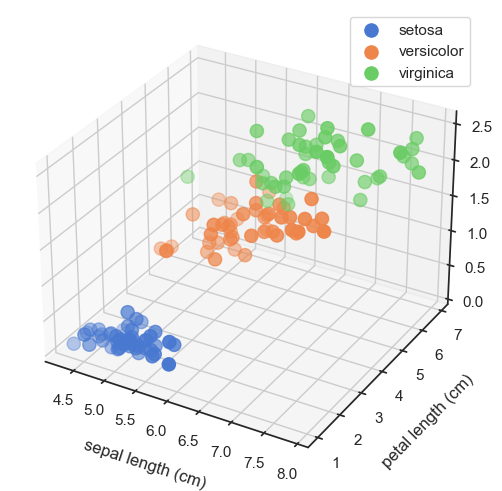

In [5]:
# Plot the raw data in 3D:
fig1 = plt.figure(constrained_layout=True)
ax1 = fig1.add_subplot(111, projection="3d")

x = "sepal length (cm)"
y = "petal length (cm)"
z = "petal width (cm)"

for flower in data["Flower"].unique():
    ax1.scatter(
        data[data["Flower"] == flower][x],
        data[data["Flower"] == flower][y],
        data[data["Flower"] == flower][z],
        s=90,
        label=flower,
    )
ax1.legend()
ax1.set_xlabel(x, labelpad=10)
ax1.set_ylabel(y, labelpad=10)
ax1.set_zlabel(z, labelpad=10);

In [6]:
# Run Principal Component Analysis:
pca = PCA()
X = scale(data[variables])
scores = pca.fit_transform(X)
# "scores" are the new coordinates!

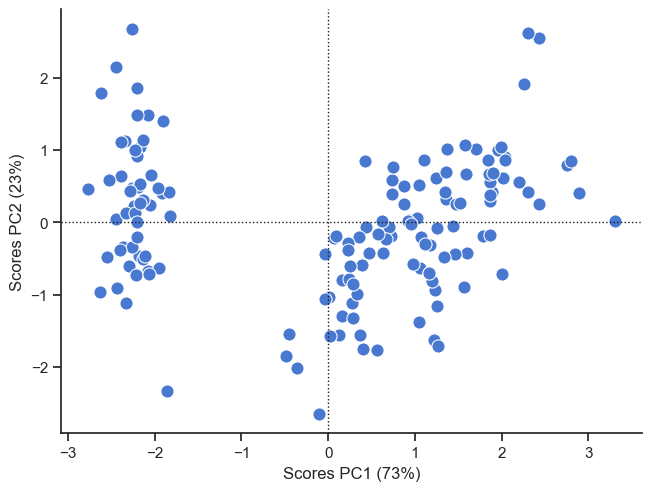

In [7]:
# We can plot the scores agains each other:
fig2, ax2 = plt.subplots(constrained_layout=True)
sns.scatterplot(data=data, x=scores[:, 0], y=scores[:, 1], ax=ax2, s=90)

# The rest of the code here is just to style the plot:
ax2.axhline(y=0, ls=":", c="k", lw=1)
ax2.axvline(x=0, ls=":", c="k", lw=1)
ax2.set(xlabel=f"Scores PC1 ({pca.explained_variance_ratio_[0]*100:.2g}%)")
ax2.set(ylabel=f"Scores PC2 ({pca.explained_variance_ratio_[1]*100:.2g}%)")
sns.despine(fig=fig2)

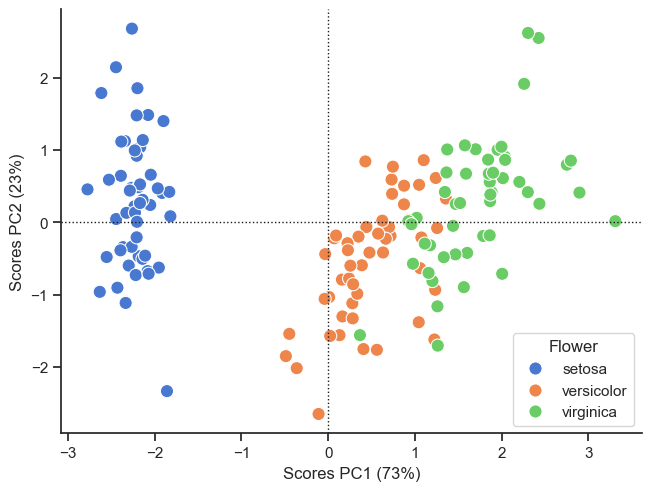

In [8]:
# We can plot the scores agains each other:
fig3, ax3 = plt.subplots(constrained_layout=True)
sns.scatterplot(
    data=data, x=scores[:, 0], y=scores[:, 1], ax=ax3, s=90, hue="Flower"
)

# The rest of the code here is just to style the plot:
ax3.axhline(y=0, ls=":", c="k", lw=1)
ax3.axvline(x=0, ls=":", c="k", lw=1)
ax3.set(xlabel=f"Scores PC1 ({pca.explained_variance_ratio_[0]*100:.2g}%)")
ax3.set(ylabel=f"Scores PC2 ({pca.explained_variance_ratio_[1]*100:.2g}%)")
sns.despine(fig=fig3)

In [9]:
# Loadings represents the transformation from the old axes to the new ones.
# We can get information on the loadings by inspecting the pca object:
loadings = pca.components_
loadings

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [10]:
# Here, each row is a single principal component, for instance:
pc1 = pca.components_[0, :]
print(pc1)

[ 0.52106591 -0.26934744  0.5804131   0.56485654]


In [11]:
# These numbers, i.e. from print(pc1), define how we construct the first principal component:
text = " + ".join([f"{i:4.2f} * ({j})" for i, j in zip(pc1, variables)])
print(f"pc1 = {text}")

pc1 = 0.52 * (sepal length (cm)) + -0.27 * (sepal width (cm)) + 0.58 * (petal length (cm)) + 0.56 * (petal width (cm))


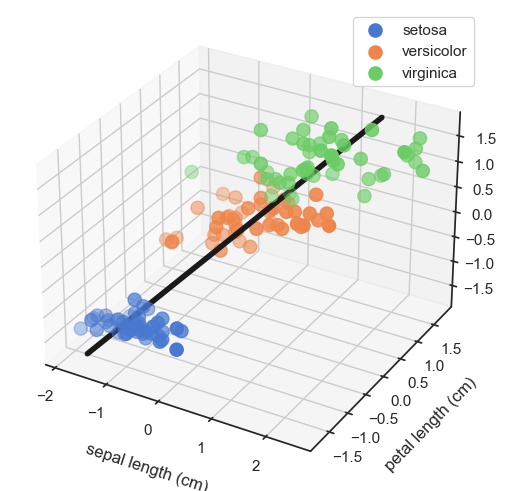

In [12]:
# Let us try to add this line to the original 3D plot
fig4 = plt.figure(constrained_layout=True)
ax4 = fig4.add_subplot(111, projection="3d")

x = "sepal length (cm)"
y = "petal length (cm)"
z = "petal width (cm)"

for flower in data["Flower"].unique():
    ax4.scatter(
        X[data["Flower"] == flower, 0],
        X[data["Flower"] == flower, 2],
        X[data["Flower"] == flower, 3],
        s=90,
        label=flower,
    )

direction = np.array([pc1[0], pc1[2], pc1[3]])

vector1 = 3 * direction
vector2 = -3 * direction

ax4.plot(
    [vector2[0], vector1[0]],
    [vector2[1], vector1[1]],
    [vector2[2], vector1[2]],
    color="k",
    lw=4,
)
ax4.set_xlabel(x, labelpad=10)
ax4.set_ylabel(y, labelpad=10)
ax4.set_zlabel(z, labelpad=10)
ax4.legend();

In [13]:
# Let us look at the two first principal components:
pc1 = pca.components_[0, :]
pc2 = pca.components_[1, :]
print(f"PC1 = {pc1}")
print(f"PC2 = {pc2}")
text1 = " + ".join([f"{i:4.2f} * ({j})" for i, j in zip(pc1, variables)])
print(f"PC1 = {text1}")
text2 = " + ".join([f"{i:4.2f} * ({j})" for i, j in zip(pc2, variables)])
print(f"PC2 = {text2}")

PC1 = [ 0.52106591 -0.26934744  0.5804131   0.56485654]
PC2 = [0.37741762 0.92329566 0.02449161 0.06694199]
PC1 = 0.52 * (sepal length (cm)) + -0.27 * (sepal width (cm)) + 0.58 * (petal length (cm)) + 0.56 * (petal width (cm))
PC2 = 0.38 * (sepal length (cm)) + 0.92 * (sepal width (cm)) + 0.02 * (petal length (cm)) + 0.07 * (petal width (cm))


In [14]:
# We can plot contributions from the original variables to the new ones in a loadings plot:
def plot_loadings_arrows(pca, idxi=0, idxj=1, labels=None):
    fig, ax = plt.subplots(constrained_layout=True)

    loadings = pca.components_.T

    load1 = loadings[:, idxi]
    load2 = loadings[:, idxj]

    var1 = pca.explained_variance_ratio_[idxi] * 100
    var2 = pca.explained_variance_ratio_[idxj] * 100

    ax.set(xlabel=f"Loadings PC1 ({var1:.2g}%)")
    ax.set(ylabel=f"Loadings PC2 ({var2:.2g}%)")
    ax.axhline(y=0, ls=":", color="k")
    ax.axvline(x=0, ls=":", color="k")

    ax.scatter(load1, load2, color="none")  # to adjust the axes

    for i in range(pca.n_features_in_):
        x, y = load1[i], load2[i]

        ax.annotate(
            "",
            xy=(x, y),
            xytext=(0, 0),
            arrowprops=dict(
                arrowstyle="-|>", lw=2, color="red", mutation_scale=25
            ),
        )
        txt = f"{i}"
        if labels is not None:
            txt = labels[i]
        ax.text(x, y, txt, fontsize="xx-small")

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect("equal")
    sns.despine(fig=fig)

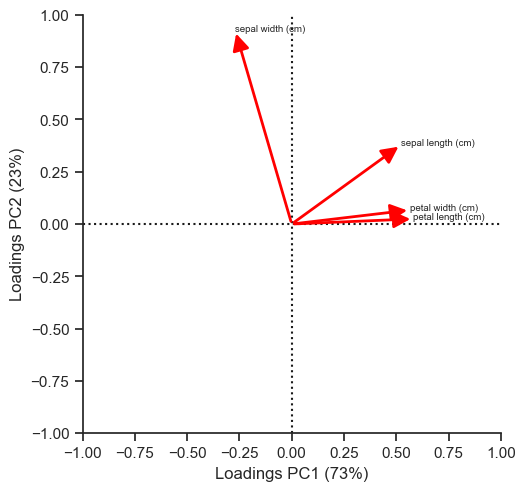

In [15]:
plot_loadings_arrows(pca, idxi=0, idxj=1, labels=variables)

From this plot we can learn the following:

* We see that the petal length and the petal width are close together. This means that they are correlated. The practical implication of this is: *we only need one of them for describing the variation in the data (not both)*.

* Along PC2, the sepal width has a much larger value than the others. This means that PC2 is largely determined by the sepal width.

* Along PC1, the sepal length, the petal length, and the petal width have almost the same contribution (i.e. they are close together viewed along PC1). That means that they are all correlated here and we can probably explain a lot of the variance using just one of them.

Based on this we expect that we can explain a lot of the variance in the data using just two variables,
for instance, **sepal width** and **petal length**. Of course, this is something we could have figured out just by plotting all pairs of possible variables. Here there are only four variables and the number of such plots would then be $\binom{4}{2} = 6$. This is something we can manage. But if we have many variables, it will be tedious to do!

Let us test this conclusion by plotting the original data using the two original variables petal length and sepal width:

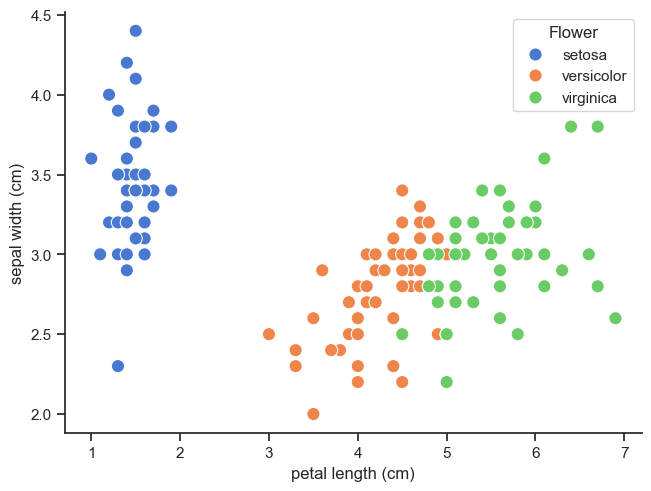

In [16]:
fig6, ax6 = plt.subplots(constrained_layout=True)
sns.scatterplot(
    data, x="petal length (cm)", y="sepal width (cm)", hue="Flower", s=90
)
sns.despine(fig=fig6)

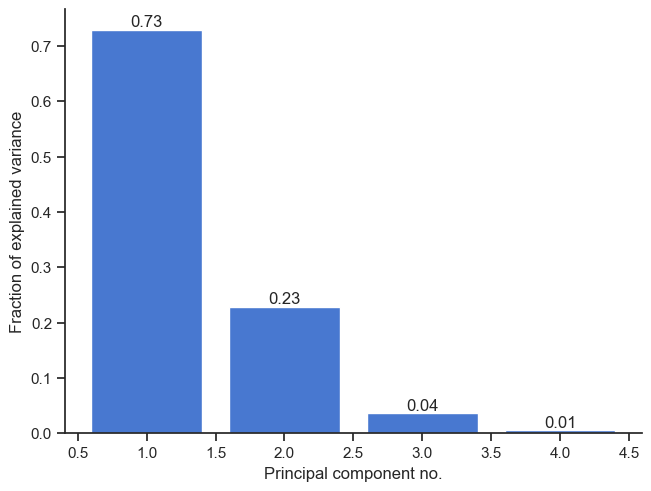

In [17]:
# In the previous plot, we used two variables. But they are not necessarily equally important for
# describing the variance in the original data. We can check their importance by plotting the explained
# variance as a function of the number of principal components:
fig7, ax7 = plt.subplots(constrained_layout=True)
bar = ax7.bar([1, 2, 3, 4], pca.explained_variance_ratio_)
ax7.bar_label(bar, fmt="{:.2f}")

ax7.set(
    xlabel="Principal component no.", ylabel="Fraction of explained variance"
)
sns.despine(fig=fig7)